# MBTI Personality Analysis
### Ishita Chatterjee

Personality is a widely studied concept in psychology. There are many tests and resources avaliable to categorize personality and personality traits. One widely used personality test is the Myers-Briggs Type Indicator (MBTI). This test splits personality into 4 components (Extroversion vs Introversion, Sensing vs Intuition, Thinking vs Feeling, and Judging vs Perceiving). Each personality type consists of 1 letter code from each category, creating 16 different personality types. More information about each of the categories can be found at https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/. 

The dataset used throughout this project was taken from https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt?select=16P.csv. It contains answers to different personality questions as well as the MBTI personality type. The answers range from -3 to 3 depending on how strongly the individual disagrees (negative values) or agrees (positive values) with the statements. 






## Data Setup


Before beginning any analysis, I had to import the data and the necessary libraries. I uploaded the csv to my Google Drive and read in the csv file using Pandas.  

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn

from sklearn.neural_network import MLPClassifier
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

drive.mount('/content/drive', force_remount=True)
df = pd.read_csv("/content/drive/My Drive/Fall 2022/CMSC320/data/16P.csv", encoding='cp1252')

Mounted at /content/drive


After uploading the data into a dataframe, I stored the statements/column names into an array for later reference. 

In [22]:
old_columns = df.columns 
print(old_columns)

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

Next, I renamed the dataframe column headers into relevant short phrases for ease of access when using the individual columns. I also added a mapping from personality type to numerical code to aid in the analysis. 

In [23]:
df.columns = ['ID', 'new_friends', 'explore_interests', 'crying', 'backup_plan', 'under_pressure', 'social_events', 
              'projects', 'sentimental', 'organization', 'mistakes', 'new_convo', 'analyzing_works', 'follow_head', 
              'spontaneity', 'first_impressions', 'groups', 'media_interp', 'helping_others', 'many_interests', 
              'worrying', 'avoid_leadership', 'not_artsy', 'prefer_rationality', 'chores', 'argue', 'avoid_attention', 
              'mood_changes', 'patience', 'procrastinate', 'afterlife', 'company', 'theory', 'empathy', 'postpone_finalizing', 
              'second_guessing', 'socializing', 'art_museums', 'no_empathy', 'todo_list', 'insecure', 'phone', 'diff_views', 
              'reaching_out', 'plan', 'ruminating', 'meaning_of_life', 'emotions', 'others_impressions', 'spontaneous_work', 
              'disappoint', 'work_alone', 'philosophy', 'busyness', 'reading_emotions', 'overwhelmed', 'methodical', 
              'controversy', 'others_first', 'deadlines', 'hope', 'personality']

personalityIds = {"ESTJ": 0, "ENTJ": 1, "ESFJ": 2, "ENFJ": 3, "ISTJ": 4, "ISFJ": 5, "INTJ": 6, "INFJ": 7, "ESTP": 8, "ESFP": 9, "ENTP": 10, "ENFP": 11, "ISTP": 12, "ISFP": 13, "INTP": 14, "INFP": 15}
df["personalityId"] = df["personality"].apply(lambda x: personalityIds[x])

df.head(10)

,ID,new_friends,explore_interests,crying,backup_plan,under_pressure,social_events,projects,sentimental,organization,...,busyness,reading_emotions,overwhelmed,methodical,controversy,others_first,deadlines,hope,personality,personalityId
0,0,0,0,0,0,0,1,1,0,0,...,0,0,-1,0,0,0,0,0,ENFP,11
1,1,0,0,-2,-3,-1,2,-2,0,3,...,-2,0,2,0,-1,-1,-1,3,ISFP,13
2,2,0,0,2,0,-1,2,0,0,1,...,2,0,2,-1,0,1,2,1,INFJ,7
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,-1,-1,0,1,0,-2,-1,ISTP,12
4,4,0,0,-1,0,2,-1,-2,0,1,...,1,0,2,0,1,-1,2,-1,ENFJ,3
5,5,0,0,1,0,1,-2,-1,0,2,...,3,0,2,0,0,2,2,1,INTJ,6
6,6,0,0,-2,0,-1,1,-2,0,1,...,-2,1,2,0,0,-1,-1,1,ISFP,13
7,7,0,0,-3,0,-1,0,-2,0,0,...,-1,0,1,0,0,-1,2,-1,INTJ,6
8,8,0,0,-2,1,-2,1,-1,0,2,...,1,0,1,0,0,3,2,-2,ENTJ,1
9,9,0,-1,0,0,-1,2,1,0,-2,...,-1,0,-1,0,0,1,0,1,ESFP,9


## Data Exploration

First, I used the describe function to get a general idea of the distributions of the data. 

In [24]:
df.describe()

,ID,new_friends,explore_interests,crying,backup_plan,under_pressure,social_events,projects,sentimental,organization,...,philosophy,busyness,reading_emotions,overwhelmed,methodical,controversy,others_first,deadlines,hope,personalityId
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,29999.000000,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,...,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202,7.499975
std,17320.363738,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,...,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457,4.607418
min,0.000000,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,...,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000,0.000000
25%,14999.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,4.000000
50%,29999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,44998.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.000000
max,59998.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,15.000000


I used the value counts function on the personality column to check if there are about equal numbers for each personality type. 

In [25]:
df["personality"].value_counts()

ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: personality, dtype: int64

Overall, the distribution of personalities is mostly uniform. Next, I used the corr function to determine whether any question has a large impact on the personality. 

In [26]:
df.corr()

,ID,new_friends,explore_interests,crying,backup_plan,under_pressure,social_events,projects,sentimental,organization,...,philosophy,busyness,reading_emotions,overwhelmed,methodical,controversy,others_first,deadlines,hope,personalityId
ID,1.000000,0.001059,0.004834,0.012084,0.005555,0.003868,-0.001606,0.009391,-0.000709,-0.003243,...,0.005637,0.008918,0.001178,-0.006543,-0.000524,0.006887,0.000476,-0.006921,-0.005207,0.004216
new_friends,0.001059,1.000000,0.001872,-0.003700,0.004305,-0.002460,0.000428,-0.002956,0.000989,-0.000872,...,0.001737,-0.003612,-0.002004,-0.003878,-0.001628,-0.001109,0.002872,0.002963,0.001511,-0.004748
explore_interests,0.004834,0.001872,1.000000,0.001856,-0.003393,-0.001457,0.001447,-0.001180,0.004975,-0.003611,...,-0.001119,-0.000921,0.002112,-0.002113,-0.001255,-0.009923,-0.000678,-0.000958,-0.000702,0.003452
crying,0.012084,-0.003700,0.001856,1.000000,0.071982,0.014353,0.003865,0.042517,0.000060,0.106469,...,-0.000861,0.048100,0.002681,0.062870,-0.004040,-0.000682,0.051303,0.060876,0.080745,0.115781
backup_plan,0.005555,0.004305,-0.003393,0.071982,1.000000,-0.040502,-0.210979,-0.037477,-0.000051,-0.004150,...,-0.003898,0.065071,0.003745,-0.035781,0.000899,-0.008573,0.171982,-0.009186,0.014211,0.057483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
controversy,0.006887,-0.001109,-0.009923,-0.000682,-0.008573,-0.000391,0.005970,-0.009071,-0.001106,0.003765,...,0.001476,-0.003220,-0.000360,0.004359,-0.002231,1.000000,-0.005163,0.000650,0.003381,0.000609
others_first,0.000476,0.002872,-0.000678,0.051303,0.171982,0.035731,-0.040249,-0.098562,-0.002331,0.055080,...,-0.005025,0.102630,-0.005842,-0.002153,-0.000030,-0.005163,1.000000,-0.067984,0.045948,-0.025375
deadlines,-0.006921,0.002963,-0.000958,0.060876,-0.009186,-0.094340,0.006118,0.059372,0.001044,-0.059337,...,-0.000744,-0.049631,-0.003124,-0.053115,-0.000298,0.000650,-0.067984,1.000000,0.069529,-0.223926
hope,-0.005207,0.001511,-0.000702,0.080745,0.014211,0.012393,-0.113607,0.049881,0.002321,0.048672,...,0.002412,0.036048,0.001426,0.038728,0.002276,0.003381,0.045948,0.069529,1.000000,0.050911


From looking at the correlations, it does not seem like any one question has a strong correlation with the personality. Since personality is a combination of various traits and behaviors, it makes sense that no one question would have a large correlation with personality. The questions also do not seem correlated with each other. I decided to split the dataframe into 4 subsets based on question type. The divisions were based on my understanding of the categories and my best judgement about which question belongs to which category. 

I first created a separate dataframe for the questions involving extroversion or introversion. I added a binary column at the end for the personality type. 0 represents extrovert (E) and 1 represents introvert (I). After creating the dataframe, I used the corr function to see the correlations between the questions and personality type. 

In [27]:
extrointro = df.loc[:, ['new_friends', 'social_events', 'new_convo', 'groups', 'avoid_attention', 'phone', 'avoid_leadership', 'argue', 'company', 'socializing', 'reaching_out', 'work_alone', 'busyness', 'personality', 'personalityId']]
extrointro["EvsI"] = extrointro["personalityId"].apply(lambda x: 0 if (x >= 0 and x <= 3) or (x >= 8 and x <= 11) else 1)

extrointro.corr()


,new_friends,social_events,new_convo,groups,avoid_attention,phone,avoid_leadership,argue,company,socializing,reaching_out,work_alone,busyness,personalityId,EvsI
new_friends,1.000000,0.000428,0.003001,-0.004904,-0.003315,0.001016,-0.000363,0.006911,0.007659,-0.003765,0.004741,-0.010965,-0.003612,-0.004748,-0.006474
social_events,0.000428,1.000000,-0.067939,-0.024804,-0.076655,0.120199,0.006738,0.063303,0.098056,0.000829,0.091754,0.004274,-0.111823,-0.018274,-0.001892
new_convo,0.003001,-0.067939,1.000000,-0.095185,0.007487,0.143304,0.004255,-0.009828,0.031304,0.033979,-0.010046,-0.004365,0.175074,-0.012847,0.006331
groups,-0.004904,-0.024804,-0.095185,1.000000,-0.057153,-0.039325,-0.009161,-0.117713,-0.074009,-0.092189,0.023832,-0.005214,-0.065727,0.057748,0.115229
avoid_attention,-0.003315,-0.076655,0.007487,-0.057153,1.000000,0.058178,0.002368,-0.063311,0.107686,-0.056639,-0.016985,0.002845,0.063820,-0.140831,-0.191507
phone,0.001016,0.120199,0.143304,-0.039325,0.058178,1.000000,-0.002867,0.053663,-0.060788,0.009280,-0.007925,-0.000024,0.155406,-0.089571,-0.073071
avoid_leadership,-0.000363,0.006738,0.004255,-0.009161,0.002368,-0.002867,1.000000,-0.005594,0.002252,0.000634,0.001208,-0.001632,0.002316,-0.001870,-0.001679
argue,0.006911,0.063303,-0.009828,-0.117713,-0.063311,0.053663,-0.005594,1.000000,-0.065483,0.145567,-0.023236,-0.006973,0.051621,0.081908,-0.038988
company,0.007659,0.098056,0.031304,-0.074009,0.107686,-0.060788,0.002252,-0.065483,1.000000,-0.036782,0.065449,-0.000203,0.005819,0.116971,-0.034250
socializing,-0.003765,0.000829,0.033979,-0.092189,-0.056639,0.009280,0.000634,0.145567,-0.036782,1.000000,-0.122256,-0.006799,0.060460,-0.069151,-0.037015


In addition to the tablular view of the correlations, I created a heatmap to better visualize the correlations. 

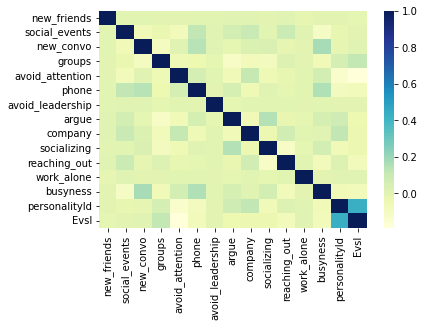

In [28]:
sns.heatmap(extrointro.corr(), cmap="YlGnBu")

As with the overall dataset, no particular question has a large correlation with the personality type. The questions are also worded in a way that answering strongly in one way would predict either extroversion or introversion but not both so it may be difficult to measure the correlations in this manner without accounting for what personality type the question is biased toward. 

I followed the same process of creating separate dataframes, calculating the correlations, and graphing the correlations in a heatmap for the other 3 personality categories. For the binary column for the sensing vs inuition dataframe, 0 represents sensing (S) and 1 represents intuition (N). 

In [29]:
senseintuit = df.loc[:, ['analyzing_works', 'media_interp', 'not_artsy', 'afterlife', 'theory', 'diff_views', 'philosophy', 'controversy', 'second_guessing', 'art_museums', 'meaning_of_life', 'personality', 'personalityId']]
senseintuit["SvsN"] = senseintuit["personalityId"].apply(lambda x: 0 if (x >= 0 and x <= 1) or (x >= 4 and x <= 5) or (x >= 8 and x <= 9) or (x >= 12 and x <= 13) else 1)

senseintuit.corr()

,analyzing_works,media_interp,not_artsy,afterlife,theory,diff_views,philosophy,controversy,second_guessing,art_museums,meaning_of_life,personalityId,SvsN
analyzing_works,1.000000,0.058321,0.094614,-0.134531,0.008718,0.067166,0.000207,0.000384,0.006195,0.019545,-0.007507,-0.104130,0.005210
media_interp,0.058321,1.000000,0.037378,-0.130262,0.003446,-0.179898,0.004175,-0.001087,-0.156547,0.100860,0.000540,-0.143890,-0.000702
not_artsy,0.094614,0.037378,1.000000,-0.036701,-0.002825,0.063556,-0.000425,-0.007739,-0.046030,0.009246,0.004413,-0.092665,0.078492
afterlife,-0.134531,-0.130262,-0.036701,1.000000,0.000287,0.009396,0.000803,-0.003821,0.132047,-0.111287,0.003232,0.028163,0.152543
theory,0.008718,0.003446,-0.002825,0.000287,1.000000,-0.008079,-0.000612,-0.003176,0.000245,0.000734,0.008039,-0.001371,-0.003612
diff_views,0.067166,-0.179898,0.063556,0.009396,-0.008079,1.000000,0.002536,0.014162,0.106937,-0.050565,-0.004766,0.026067,0.072256
philosophy,0.000207,0.004175,-0.000425,0.000803,-0.000612,0.002536,1.000000,0.001476,-0.009016,-0.000120,-0.000125,0.003857,0.000907
controversy,0.000384,-0.001087,-0.007739,-0.003821,-0.003176,0.014162,0.001476,1.000000,-0.000402,0.001189,0.007308,0.000609,-0.003166
second_guessing,0.006195,-0.156547,-0.046030,0.132047,0.000245,0.106937,-0.009016,-0.000402,1.000000,-0.076859,0.004263,-0.086080,0.073358
art_museums,0.019545,0.100860,0.009246,-0.111287,0.000734,-0.050565,-0.000120,0.001189,-0.076859,1.000000,-0.009680,0.020736,-0.079154


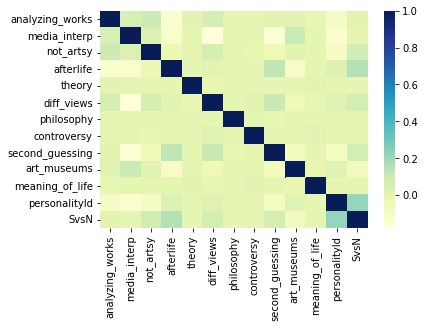

In [30]:
sns.heatmap(senseintuit.corr(), cmap="YlGnBu")

Similar to the extroversion vs introversion data, no particular question is largely correlated with personality. 

For the binary column for the thinking vs feeling dataframe, 0 represents thinking (T) and 1 represents feeling (F).

In [31]:
thinkfeel = df.loc[:, ['crying', 'under_pressure', 'mistakes', 'helping_others', 'ruminating', 'mood_changes', 'overwhelmed', 'others_first', 'disappoint', 'others_impressions', 'hope', 'insecure', 'patience', 'worrying', 'sentimental', 'follow_head', 'prefer_rationality',  'empathy', 'no_empathy', 'emotions', 'reading_emotions', 'personality', 'personalityId']]
thinkfeel["TvsF"] = thinkfeel["personalityId"].apply(lambda x: 0 if (x % 2 == 0) else 1)

thinkfeel.corr()

,crying,under_pressure,mistakes,helping_others,ruminating,mood_changes,overwhelmed,others_first,disappoint,others_impressions,...,worrying,sentimental,follow_head,prefer_rationality,empathy,no_empathy,emotions,reading_emotions,personalityId,TvsF
crying,1.000000,0.014353,-0.001870,0.160942,-0.009328,-0.057397,0.062870,0.051303,-0.006060,0.000089,...,0.081571,0.000060,0.022289,-0.002591,-0.050627,0.001420,-0.107906,0.002681,0.115781,0.001615
under_pressure,0.014353,1.000000,0.007197,-0.003684,0.000435,0.008129,0.087879,0.035731,0.000337,0.001622,...,-0.054539,0.002089,0.000289,0.003386,0.120073,0.058972,0.113285,0.007085,-0.140436,-0.113051
mistakes,-0.001870,0.007197,1.000000,-0.004221,0.004133,0.003624,0.000709,-0.002974,0.007694,-0.000974,...,-0.001054,-0.001742,0.000551,0.005953,0.002112,0.006682,0.007754,-0.002652,-0.000044,0.003309
helping_others,0.160942,-0.003684,-0.004221,1.000000,-0.077037,-0.077224,-0.035118,0.017725,-0.005375,-0.000915,...,0.041184,-0.004999,0.107124,-0.003303,-0.044865,-0.018067,-0.013378,-0.000506,-0.034241,0.192467
ruminating,-0.009328,0.000435,0.004133,-0.077037,1.000000,0.057588,0.052348,0.024478,-0.000079,-0.006612,...,0.102327,0.004328,-0.049690,0.001381,0.053029,0.056649,0.091787,-0.007341,0.143502,-0.076202
mood_changes,-0.057397,0.008129,0.003624,-0.077224,0.057588,1.000000,-0.064720,0.135602,-0.002529,0.004447,...,-0.043879,-0.004346,0.073729,0.006376,0.039123,-0.151876,0.074911,-0.010629,0.091209,-0.072757
overwhelmed,0.062870,0.087879,0.000709,-0.035118,0.052348,-0.064720,1.000000,-0.002153,-0.006567,0.006672,...,0.076845,0.000755,-0.017990,0.000008,0.111850,0.051647,0.062658,-0.001357,-0.051890,-0.161673
others_first,0.051303,0.035731,-0.002974,0.017725,0.024478,0.135602,-0.002153,1.000000,-0.000312,0.000079,...,0.014858,-0.002331,-0.015742,0.002025,0.010992,-0.085240,0.002886,-0.005842,-0.025375,-0.076755
disappoint,-0.006060,0.000337,0.007694,-0.005375,-0.000079,-0.002529,-0.006567,-0.000312,1.000000,0.002117,...,0.002495,-0.003352,0.002999,-0.002488,-0.004012,-0.000934,-0.001536,-0.001245,-0.005092,-0.001596
others_impressions,0.000089,0.001622,-0.000974,-0.000915,-0.006612,0.004447,0.006672,0.000079,0.002117,1.000000,...,0.009049,0.006321,-0.001614,0.000494,-0.007295,0.002346,-0.000622,-0.000609,-0.005517,0.004233


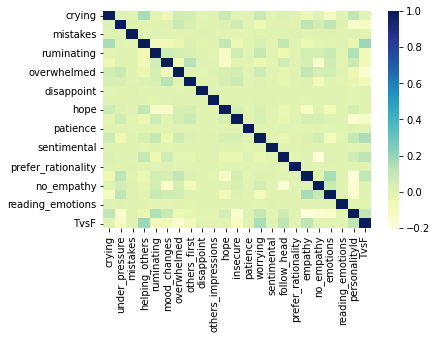

In [32]:
sns.heatmap(thinkfeel.corr(), cmap="YlGnBu")

For the binary column for the judging vs perceiving dataframe, 0 represents judging (0) and 1 represents perceiving (P).

In [33]:
judgeperceive = df.loc[:, ['explore_interests', 'backup_plan', 'first_impressions', 'projects', 'organization', 'spontaneity', 'many_interests', 'chores', 'procrastinate', 'postpone_finalizing', 'todo_list', 'plan', 'spontaneous_work', 'methodical', 'deadlines', 'personality', 'personalityId']]
judgeperceive["JvsP"] = judgeperceive["personalityId"].apply(lambda x: 0 if (x >= 0 and x <= 7) else 1)

judgeperceive.corr()

,explore_interests,backup_plan,first_impressions,projects,organization,spontaneity,many_interests,chores,procrastinate,postpone_finalizing,todo_list,plan,spontaneous_work,methodical,deadlines,personalityId,JvsP
explore_interests,1.000000,-0.003393,0.005892,-0.001180,-0.003611,0.000486,0.002552,0.004096,-0.003206,0.006284,-0.006919,-0.002714,-0.009699,-0.001255,-0.000958,0.003452,0.001646
backup_plan,-0.003393,1.000000,0.007364,-0.037477,-0.004150,0.203231,-0.025477,-0.005406,-0.099304,-0.010361,0.099363,0.111376,-0.048928,0.000899,-0.009186,0.057483,0.076693
first_impressions,0.005892,0.007364,1.000000,0.021201,0.102393,0.024934,0.065958,0.005313,-0.039564,-0.001773,0.010721,0.076666,-0.065503,-0.006334,-0.028376,0.163068,0.083169
projects,-0.001180,-0.037477,0.021201,1.000000,-0.042213,0.022415,0.016821,-0.002539,-0.050828,0.004608,0.012086,-0.173273,-0.011146,0.002679,0.059372,-0.026000,-0.000994
organization,-0.003611,-0.004150,0.102393,-0.042213,1.000000,-0.085258,0.040957,-0.000116,0.063843,-0.000184,0.046359,0.020020,-0.013062,-0.001693,-0.059337,0.037835,-0.071977
spontaneity,0.000486,0.203231,0.024934,0.022415,-0.085258,1.000000,-0.045145,0.000935,-0.144119,0.000614,0.020586,0.000551,-0.048951,0.006519,-0.030824,0.134855,0.199240
many_interests,0.002552,-0.025477,0.065958,0.016821,0.040957,-0.045145,1.000000,-0.001254,-0.058374,0.001325,0.030397,-0.047312,0.016208,-0.003913,0.066364,-0.090619,-0.042730
chores,0.004096,-0.005406,0.005313,-0.002539,-0.000116,0.000935,-0.001254,1.000000,0.003437,0.003605,-0.002434,-0.001700,-0.004006,-0.002363,0.004636,0.006753,0.003896
procrastinate,-0.003206,-0.099304,-0.039564,-0.050828,0.063843,-0.144119,-0.058374,0.003437,1.000000,-0.004127,0.093852,0.048266,0.081933,-0.003356,-0.087139,0.036368,-0.077626
postpone_finalizing,0.006284,-0.010361,-0.001773,0.004608,-0.000184,0.000614,0.001325,0.003605,-0.004127,1.000000,0.010522,-0.006755,-0.001439,-0.004664,-0.001889,0.000134,0.002251


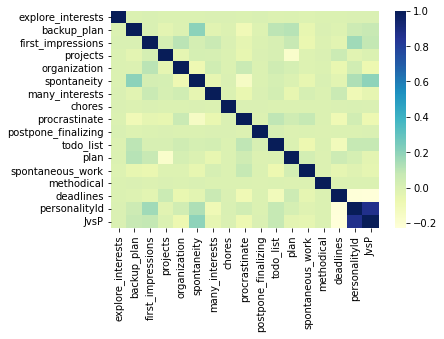

In [34]:
sns.heatmap(judgeperceive.corr(), cmap="YlGnBu")

As with the overall dataset, there is no correlation between the questions themselves and between the questions and personality type. 

## Classifications

In the next section, I will use machine learning algorithms to predict the personality based on the answers to the questions. I will be using the full dataset with all of the questions. 

The first algorithm I will try is a neural network with 3 hidden layers. 30% of the data will be used as testing data. 

In [35]:
target = ['personality']
questions = list(set(list(df.columns)) - set(target))
questions.remove('ID')
questions.remove('personalityId')

X = df[questions].values
y = df[target].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape, X_test.shape)

(41999, 60) (18000, 60)


In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

print("Training accuracy: " + str(mlp.score(X_train, y_train)) + "\n")
print("Testing accuracy: " + str(mlp.score(X_test, y_test)) +"\n")
print("Classification report for training data: ")
print(classification_report(y_train,predict_train))
print("Classification report for testing data: ")
print(classification_report(y_test,predict_test))

Training accuracy: 0.8605442986737779

Testing accuracy: 0.8581111111111112

Classification report for training data: 
              precision    recall  f1-score   support

        ENFJ       0.86      0.87      0.87      2623
        ENFP       0.88      0.83      0.86      2642
        ENTJ       0.90      0.89      0.89      2581
        ENTP       0.89      0.88      0.88      2678
        ESFJ       0.87      0.85      0.86      2610
        ESFP       0.88      0.91      0.89      2632
        ESTJ       0.89      0.88      0.89      2630
        ESTP       0.87      0.89      0.88      2647
        INFJ       0.83      0.85      0.84      2631
        INFP       0.87      0.85      0.86      2598
        INTJ       0.84      0.87      0.85      2630
        INTP       0.88      0.83      0.86      2590
        ISFJ       0.82      0.84      0.83      2608
        ISFP       0.84      0.85      0.84      2635
        ISTJ       0.82      0.84      0.83      2616
        ISTP    

The algorithm is performing similarly on the training and testing data. Overall, the precision, recall, and f1-score measures are also similar for all of the different personality types. 

Next, I will use to a random forest classifier to predict personality based on the questions. I will use the same training/testing split as for the neural network. In order to see what max_depth should be used for the classifer, I trained and tested the classifer with max depths of 10, 20, 30, 40, 50, and 60 and then graphed the results. 

In [37]:
max_depths = [10, 20, 30, 40, 50, 60]
trainingscores = []
testingscores = []
for i in max_depths:
  clf = RandomForestClassifier(max_depth=i, random_state=0)
  clf.fit(X, y)
  print("max depth: " + str(i))
  print("Training accuracy: " + str(clf.score(X_train, y_train)))
  trainingscores.append(clf.score(X_train, y_train))
  print("Testing accuracy: " + str(clf.score(X_test, y_test)))
  testingscores.append(clf.score(X_test, y_test))

max depth: 10
Training accuracy: 0.9710707397795185
Testing accuracy: 0.9705555555555555
max depth: 20
Training accuracy: 0.999523798185671
Testing accuracy: 0.9995555555555555
max depth: 30
Training accuracy: 1.0
Testing accuracy: 1.0
max depth: 40
Training accuracy: 1.0
Testing accuracy: 1.0
max depth: 50
Training accuracy: 1.0
Testing accuracy: 1.0
max depth: 60
Training accuracy: 1.0
Testing accuracy: 1.0


The following graph shows the increase in the training scores as the max depth increases. 

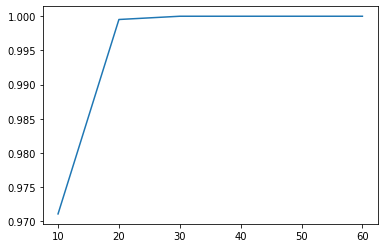

In [38]:
plt.plot(max_depths, trainingscores)

The following graph shows the increase in testing accuracy as the max depth increases. 

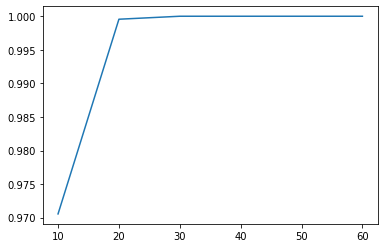

In [39]:
plt.plot(max_depths, testingscores)

For both the training and testing, the accuracy reaches 100% at a max depth of 30. Overall, the classifer performs well. 